## IMPORTING DATA IN PYTHON

### 1) Plain Text Files:
- open function is used
- with command is called a context manager as it opens a file to perform any operations. As soon as we move out of the with statement, the file is no longer open and we do not need to use the close statement

In [ ]:
# 1) Plain Text Files:

# Reading from the text file
filename = 'huck_finn.txt'
file = open(filename, mode = 'r')   # 'r' is for read
text = file.read()
file.close()
print(text)     

# Writing to the text file
filename = 'huck_finn.txt'
file = open(filename, mode = 'w')   # 'w' is for write
file.close()

# We can avoid having to close the file by using a with statement
with open('huck_finn.txt', 'r') as file:
    print(file.readline())  # Reads lines from the text
    



### 2) Flat Files
- Basic Text files containing table data without any structural relationships
- They consists of records as a unique line
- Flat files can also have a header which can be the column title
- Delimiter: The character that seperates the values in a file is known as the delimitor. eg: in a csv, a comma is the delimiter


In [ ]:
# 2) Flat Files

# IMPORTING FLAT FILES USING NUMPY
import numpy as np
filename = 'MNIST.txt'
# np.loadtxt tends to break down when we have mixed datatypes
data = np.loadtxt(filename, delimiter = ',', skiprows = 1, usecols = [0, 2], dtype = str)
print(data)

# Assign the filename: file
file = 'titanic.csv'

# Import file using np.genfromtxt
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter = ',', names = True, dtype = None )

# Print out first three entries of d
print(d[:3])


# IMPORTING FLAT FILES USING PANDAS
import pandas as pd
filename = 'winequality-red.csv'
data = pd.read_csv(filename)
# Converting dataframe to a numpy array
data_array = data.values
#Example 2:
# Assign the filename: file
file = 'digits.csv'
# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv('digits.csv', nrows = 5, header = None)
# Build a numpy array from the DataFrame: data_array
data_array = data.values
# Print the datatype of data_array to the shell
print(type(data_array))

# comment takes characters that comments occur after in the file, which in this case is '#'. 
# na_values takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


### Pickled File
- File type native to python
- For many datatypes, it is not clear on how to store them
- Pickled Files are serialized
- Serialize = Converting an object to bytes


In [ ]:
# Importing Pickled Files:
import pickle
with open('pickled_fruit.pkl', 'rb') as file:   # 'rb' stands for read binary
    data = pickle.load(file)
print(data)

In [ ]:
# Importing Excel Spreadsheets:
import pandas as pd
file = 'urbanpop.xlsx'
data = pd.ExcelFile(file)
print(data.sheet_names)
df1 = data.parse('1960-1966')   # Sheet name as a string
df2 = data.parse(0) # Sheet index as a float


# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[1], names=['Country', 'AAM due to War (2002)'])
# Print the head of the DataFrame df1
print(df1.head())
# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[1], names=['Country'])
# Print the head of the DataFrame df2
print(df2.head())


### Importing SAS/Stata files

#### SAS
- SAS: Statistical Analysis System
- used in business statistics and biostatistics
- SAS is a software used for advanced analytics, multivariate analysis, business intelligence, data management, predictive management
- SAS files have the extension '.sas7bdat' or '.sas7bcat'

#### Stata
- Stata: "Statistics" + "Data"
- Stata files have extension '.dta'
- used in academic and social sciences research


In [ ]:
# Importing SAS files

import pandas as pd
from sas7bdat import SAS7BDAT
with SAS7BDAT('urbanpop.sas7bday') as file:
    df_sas = file.to_data_frame()

# Importing Stata files
import pandas as pd
data = pd.read_stata('urbanpop.dta')


### Importing HDF5 files

- "Hierarchical Data Format version 5"
- It is the standart mechanism for large quantities of numnerical data
- HDF5 can scale upto exabytes
- Has the extension '.hdf5'

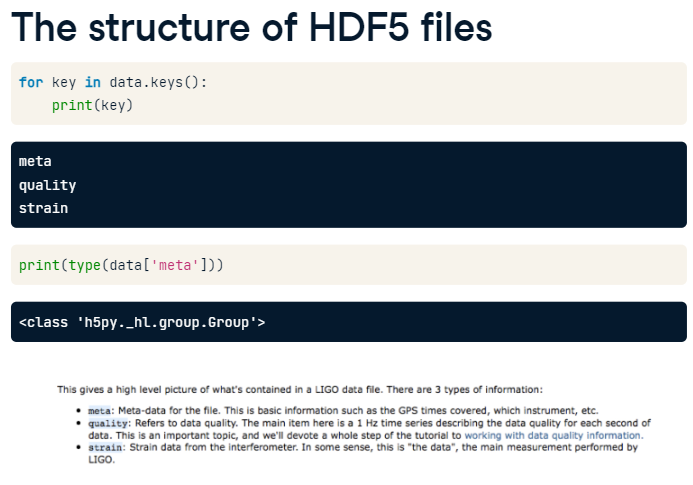


In [ ]:
# Importing HDF5 files

import h5py
filename = 'filename.hdf5'
data = h5py.File(filename, 'r')
print(type(data))   # We see that we are dealing with an hdf5 file

# Structure of HDF5 files
for key in data.keys():
    print(key)
print(type(data['meta']))   # Seeing the filetype of the 'meta' key each of which is an dirrectory and hdf group

for key in data['meta'].keys():
    print(key)
# These can be converted to a numoy array
print(np.array(data['meta']['Description']))

### Importing MATLAB Files
- Short for "Matrix Laboratory"
- Industry standard in engineering and science


In [ ]:
# Importing MATLAB Files

import scipy.io
filename = 'workspace.mat'
mat = scipy.io.loadmat(filename)
print(type(mat))

### Relational Databases:

- Database based upon the relational model of data
- Each table represents a different entity type.
- Each row in a table represents an instance of that entity type and each column represents a festure of the entity type
- Rules are summarized neatly in Codd's 12 rules/commandments. The rules are 0 indexed so there are actually 13 rules
- Popular Relational Database Management Systems - PostgreSQL, MySQL, SQLite


### Creating a Database Engine using SQLite

- SQLite is fast and simple
- Using SQLAlchemy
- to create an engine to connect to 'Northwind.sqlite', we need to execute the command: 

engine = create_engine('sqlite:///Northwind.sqlite')

- Here, 'sqlite:///Northwind.sqlite' is called the connection string to the SQLite database Northwind.sqlite

In [ ]:
# Creating a Database Engine using SQLite

from sqlalchemy import create_engine
# A SQL engine communicates our queries to the database
engine = create_engine('sqlite:///Northwind.sqlite')
# Getting table names
table_names = engine.table_names()
print(table_names)

### Querying Relational Databases

#### Workflow of SQL querying
1) Import packages and fucntions
2) Create the database engine
3) Connect to the engine
4) Query the database
- Execute method is used to query the database with a single argument - The relevant SQL query
- To turn the result object to a dataframe, we apply the '.fetchall' method
- The '.fetchmanysize = )' methods imports the number of rows specified in the size argument
5) Save Query results to a Dataframe
6) Close the connection
- we can use a context manager to save from the hastle of having to close the connection

In [ ]:
# 1) Import packages and fucntions
from sqlalchemy import create_engine
import pandas as pd

# 2) Create the database engine
engine = create_engine('sqlite:///Northwind.sqlite')

# 3) Connect to the engine
con = engine.connect()

# 4) Query the database
# Execute method is used to query the database
rs = con.execute("SELECT * FROM Orders")

# 5) Save Query results to a Dataframe
# To turn the result object to a dataframe, we apply the '.fetchall' method
df = pd.DataFrame(rs.fetchall())
# Setting the column names of the dataframe
df.columns = rs.keys()
# Printing the query results
print(df.head())

# 6) Close the connection 
con.close()


In [ ]:
# Using a context manager
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('sqlite:///Northwind.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT OrderID, OrderDate, ShipName from Orders")
    df = pd.DataFrame(rs.fetchmany(size = 5))
    df.columns = rs.keys()

In [ ]:
# The Pandas way to query
df = pd.read_sql_query("SELECT * FROM Orders", engine)

### Exploting Table Relationships

- Tables are joined


In [ ]:
# Inner join
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite"///Chinook.sqlite')
df = pd.read_sql_query("SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID", engine)
print(df.head())